# Getting Started with ```senselab```

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensein/senselab/blob/main/tutorials/getting_started.ipynb)


Welcome to the `senselab` quick start tutorial! 

This guide will showcase some of the key functionalities offered by `senselab`. We'll cover how to read, preprocess, analyze, and manipulate audio data. For more details, please check the documentation and task-specific tutorials. 

Note that the package evolves continuously, so if you find that this tutorial breaks at some point, please let us know by opening an issue. 

Let's get started!

## Installation

In [ ]:
pip install senselab

## Reading audio clips from disk:
Need to read some audio files from disk? **EASY!**

In [1]:
from senselab.audio.data_structures import Audio

MONO_AUDIO_PATH = "../src/tests/data_for_testing/audio_48khz_mono_16bits.wav"
STEREO_AUDIO_PATH = "../src/tests/data_for_testing/audio_48khz_stereo_16bits.wav"

audio1 = Audio.from_filepath(MONO_AUDIO_PATH)
audio2 = Audio.from_filepath(STEREO_AUDIO_PATH)

## Downmixing audio clips to mono
Want to downmix your audio to mono? It has neve been that **EASY!**! Here’s how:

In [3]:
from senselab.audio.tasks.preprocessing.preprocessing import downmix_audios_to_mono

print("The original audio has {} channels.".format(audio2.waveform.shape[0]))
audio2 = downmix_audios_to_mono([audio2])[0]
print("The downmixed audio has {} channels.".format(audio2.waveform.shape[0]))

The original audio has 2 channels.
The downmixed audio has 1 channels.


## Resampling audio clips to 16000 Hz
Need to resample your audio to 16000 Hz? **EASY!**



In [5]:
from senselab.audio.tasks.preprocessing.preprocessing import resample_audios

print("The original audio has a sampling rate of {} Hz.".format(audio1.sampling_rate))
[audio1, audio2] = resample_audios([audio1, audio2], resample_rate=16000)
print("The resampled audio has a sampling rate of {} Hz.".format(audio1.sampling_rate))

The original audio has a sampling rate of 48000 Hz.
The resampled audio has a sampling rate of 16000 Hz.


## Playing and plotting audio
Want to play or plot your audio? **EASY!**! Here is how:

In [7]:
from senselab.audio.tasks.plotting.plotting import play_audio
play_audio(audio1)

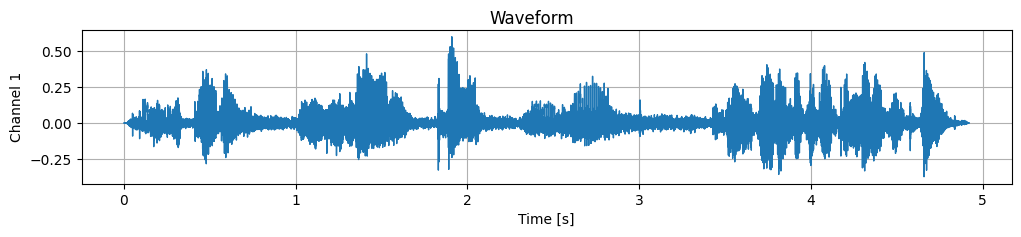

In [8]:
from senselab.audio.tasks.plotting.plotting import plot_waveform
plot_waveform(audio1)

## Voice Activity Detection
Want to detect when someone is speaking? **EASY!**

In [17]:
from senselab.audio.tasks.voice_activity_detection.api import detect_human_voice_activity_in_audios
from senselab.utils.data_structures.model import PyannoteAudioModel

pyannote_model = PyannoteAudioModel(path_or_uri="pyannote/speaker-diarization-3.1", revision="main")
voice_activity_results = detect_human_voice_activity_in_audios(audios=[audio1, audio2], model=pyannote_model)
print("Voice activity detection results: {}".format(voice_activity_results))

Voice activity detection results: [[ScriptLine(text=None, speaker='VOICE', start=0.03096875, end=3.1359687500000004, chunks=None), ScriptLine(text=None, speaker='VOICE', start=3.3553437500000003, end=3.6253437500000003, chunks=None), ScriptLine(text=None, speaker='VOICE', start=3.6253437500000003, end=3.94596875, chunks=None), ScriptLine(text=None, speaker='VOICE', start=3.94596875, end=4.87409375, chunks=None)], [ScriptLine(text=None, speaker='VOICE', start=0.03096875, end=3.0515937500000003, chunks=None), ScriptLine(text=None, speaker='VOICE', start=3.3215937500000003, end=4.890968750000001, chunks=None)]]


## Speaker Diarization
Wondering who is speaking and when? **EASY!**

In [19]:
from senselab.audio.tasks.speaker_diarization.api import diarize_audios

pyannote_model = PyannoteAudioModel(path_or_uri="pyannote/speaker-diarization-3.1", revision="main")
diarization_results = diarize_audios(audios=[audio1, audio2], model=pyannote_model)

print("Diarization results: {}".format(diarization_results))

Diarization results: [[ScriptLine(text=None, speaker='SPEAKER_00', start=0.03096875, end=3.1359687500000004, chunks=None), ScriptLine(text=None, speaker='SPEAKER_00', start=3.3553437500000003, end=3.6253437500000003, chunks=None), ScriptLine(text=None, speaker='SPEAKER_01', start=3.6253437500000003, end=3.94596875, chunks=None), ScriptLine(text=None, speaker='SPEAKER_00', start=3.94596875, end=4.87409375, chunks=None)], [ScriptLine(text=None, speaker='SPEAKER_00', start=0.03096875, end=3.0515937500000003, chunks=None), ScriptLine(text=None, speaker='SPEAKER_01', start=3.3215937500000003, end=4.890968750000001, chunks=None)]]


## Automatic Speech Recognition
Want to convert speech to text? **EASY!**! Use this:


In [21]:
from senselab.audio.tasks.speech_to_text import transcribe_audios
from senselab.utils.data_structures.model import HFModel

hf_model = HFModel(path_or_uri="openai/whisper-tiny", revision="main")
transcripts = transcribe_audios(audios=[audio1, audio2], model=hf_model)

print("Transcripts: {}".format(transcripts))

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
WhisperModel is using WhisperSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `layer_head_mask` not None. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Tran

Transcripts: [ScriptLine(text='This is beautiful. This is Johnny. Kenny. Enjoy. We just wanted to take a minute to thank you.', speaker=None, start=0.0, end=4.9, chunks=[ScriptLine(text='This', speaker=None, start=0.0, end=0.3, chunks=None), ScriptLine(text='is', speaker=None, start=0.3, end=0.5, chunks=None), ScriptLine(text='beautiful.', speaker=None, start=0.5, end=1.04, chunks=None), ScriptLine(text='This', speaker=None, start=1.04, end=1.28, chunks=None), ScriptLine(text='is', speaker=None, start=1.28, end=1.4, chunks=None), ScriptLine(text='Johnny.', speaker=None, start=1.4, end=1.9, chunks=None), ScriptLine(text='Kenny.', speaker=None, start=1.9, end=2.5, chunks=None), ScriptLine(text='Enjoy.', speaker=None, start=2.5, end=3.48, chunks=None), ScriptLine(text='We', speaker=None, start=3.48, end=3.58, chunks=None), ScriptLine(text='just', speaker=None, start=3.58, end=3.74, chunks=None), ScriptLine(text='wanted', speaker=None, start=3.74, end=3.9, chunks=None), ScriptLine(text='to

## Speaker Embeddings
Need to get unique speaker signatures? **EASY!** Here’s how:

In [23]:
from senselab.audio.tasks.speaker_embeddings.api import extract_speaker_embeddings_from_audios
from senselab.utils.data_structures.model import SpeechBrainModel

ecapa_model = SpeechBrainModel(path_or_uri="speechbrain/spkrec-ecapa-voxceleb", revision="main")
embeddings = extract_speaker_embeddings_from_audios(audios=[audio1, audio1], model=ecapa_model)

print("Speaker embeddings: {}".format(embeddings))

Speaker embeddings: [tensor([ 13.3957,  26.2355,  37.4537,  -2.8282,   8.9507, -29.2735,   7.2133,
         45.1035, -15.5556,  -1.7310,  21.6599, -20.0387,   3.2208,   8.7215,
        -10.7560,  22.5969,  29.0999, -11.3117,  -7.1902,   1.2383,  -1.0127,
         -2.9714,  -9.1717,   2.9307,  14.5644,  22.5480,  32.8797,  -8.2324,
        -45.2855, -44.8601,  -0.4651,   3.9789,  23.8119,   1.7783,  -5.7042,
        -15.5208,  19.8033, -24.0270,   5.0979,  -3.6242, -13.6030,  39.9842,
         13.3587,  -3.6292,  -7.7488,  15.8596, -11.6165, -11.8744,   6.2166,
         -3.0217, -21.2551,   0.7295,  19.4582,  29.5501,  -5.4905, -18.5775,
        -16.1116, -33.7832,  -3.8432,  17.6366,  -2.1034,   9.4590, -27.4943,
          0.6271,  28.4789, -10.5076, -11.0000,  -6.1025, -16.5245, -10.9806,
          1.6901,  17.1203,   1.9592, -28.5540,  24.3082,  10.7635,  -0.8738,
        -17.3388,  -8.4655,  15.3403,  22.4938,  -6.3000,   4.0899,   9.6344,
         -1.6355,  22.7877,  11.6864,  28.3

## Speech Emotion Recognition
Want to know the emotions in the speech? **EASY!**

In [25]:
from senselab.audio.tasks.classification.speech_emotion_recognition import speech_emotion_recognition_with_hf_models

emotion_model = HFModel(path_or_uri="ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition")
emotion_results = speech_emotion_recognition_with_hf_models([audio1, audio2], emotion_model)

print("Emotion results: {}".format(emotion_results))

Some weights of the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition were not used when initializing Wav2Vec2ForSequenceClassification: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.output.bias', 'classifier.output.weight', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-e

Emotion results: [('neutral', {'neutral': 0.14024856686592102, 'angry': 0.1284991055727005, 'calm': 0.12721076607704163, 'happy': 0.12397731840610504, 'disgust': 0.12309260666370392}), ('neutral', {'neutral': 0.1407526433467865, 'angry': 0.1282917857170105, 'calm': 0.12782087922096252, 'disgust': 0.12420850247144699, 'happy': 0.12152237445116043})]


## Audio Augmentation
Need to augment your audio data? **EASY!**! Here’s how:

In [26]:
from torch_audiomentations import Compose, PolarityInversion
from senselab.audio.tasks.data_augmentation.data_augmentation import augment_audios

apply_augmentation = Compose(transforms=[PolarityInversion(p=1, output_type="dict")], output_type="dict")
[augmented_audio1, augmented_audio2] = augment_audios([audio1, audio2], apply_augmentation)

print("Augmented audio: {}".format(augmented_audio1))

Augmented audio: waveform=tensor([[1.0264e-04, 7.8498e-05, 1.1372e-04,  ..., -0.0000e+00, -0.0000e+00,
         -0.0000e+00]]) sampling_rate=16000 orig_path_or_id='../src/tests/data_for_testing/audio_48khz_mono_16bits.wav' metadata={}


## Feature Extraction
Want to extract some OPENSMILE features from audio? **EASY!**


In [28]:
from senselab.audio.tasks.features_extraction.opensmile import extract_opensmile_features_from_audios

features = extract_opensmile_features_from_audios([audio1, audio2])

print("OpenSMILE features: {}".format(features))

OpenSMILE features: [{'F0semitoneFrom27.5Hz_sma3nz_amean': 0.0, 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm': 0.0, 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0': 0.0, 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0': 0.0, 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0': 0.0, 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2': 0.0, 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope': 0.0, 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope': 0.0, 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope': 0.0, 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope': 0.0, 'loudness_sma3_amean': 4.665394306182861, 'loudness_sma3_stddevNorm': 0.5007734298706055, 'loudness_sma3_percentile20.0': 1.9130202531814575, 'loudness_sma3_percentile50.0': 5.763050079345703, 'loudness_sma3_percentile80.0': 6.902288436889648, 'loudness_sma3_pctlrange0-2': 4.9892683029174805, 'loudness_sma3_meanRisingSlope': 48.17048645019531, 'loudness_sma3_stddevRisingSlope': 29.044353485107422, 'loudness_sma3_meanFallingSlope': 34.63795471191406, 'loudness_sma3_stdd

## Speech Enhancement
Need to clean up your audio? **EASY!** Here’s how:

In [30]:
from senselab.audio.tasks.speech_enhancement.api import enhance_audios
from senselab.utils.data_structures.model import SpeechBrainModel

speechbrain_model = SpeechBrainModel(path_or_uri="speechbrain/sepformer-wham16k-enhancement", revision="main")
enhanced_audios = enhance_audios(audios=[audio1, audio1], model=speechbrain_model)

print("Enhanced audios: {}".format(enhanced_audios))

Enhanced audios: [Audio(waveform=tensor([[0.0026, 0.0027, 0.0041,  ..., 0.0000, 0.0000, 0.0000]]), sampling_rate=16000, orig_path_or_id='../src/tests/data_for_testing/audio_48khz_mono_16bits.wav', metadata={}), Audio(waveform=tensor([[0.0026, 0.0027, 0.0041,  ..., 0.0000, 0.0000, 0.0000]]), sampling_rate=16000, orig_path_or_id='../src/tests/data_for_testing/audio_48khz_mono_16bits.wav', metadata={})]
